In [1]:
import pandas as pd
import pandas_ta as pta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Reading the data

In [2]:
btc = pd.read_csv("data/BTC-USD.csv")
eth = pd.read_csv("data/ETH-USD.csv")
doge = pd.read_csv("data/DOGE-USD.csv")
btc.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-14,41160.218750,41451.480469,39695.746094,39935.515625,39935.515625,24342001973
1,2022-04-15,39939.402344,40617.722656,39866.832031,40553.464844,40553.464844,21756855753
2,2022-04-16,40552.316406,40633.679688,40078.425781,40424.484375,40424.484375,16833150693
3,2022-04-17,40417.777344,40570.726563,39620.894531,39716.953125,39716.953125,19087633042
4,2022-04-18,39721.203125,40986.320313,38696.191406,40826.214844,40826.214844,33705182072


In [3]:
eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-14,3117.821777,3139.928711,2988.435303,3019.909424,3019.909424,15821419931
1,2022-04-15,3020.134521,3044.287354,3001.123291,3040.916504,3040.916504,11256651536
2,2022-04-16,3041.123291,3074.886963,3016.421143,3062.310303,3062.310303,8766710365
3,2022-04-17,3061.881836,3075.775879,2989.043945,2993.403320,2993.403320,10463091281
4,2022-04-18,2993.483887,3062.520996,2893.912842,3057.606689,3057.606689,18629381299


# Plotting the price change

<Axes: >

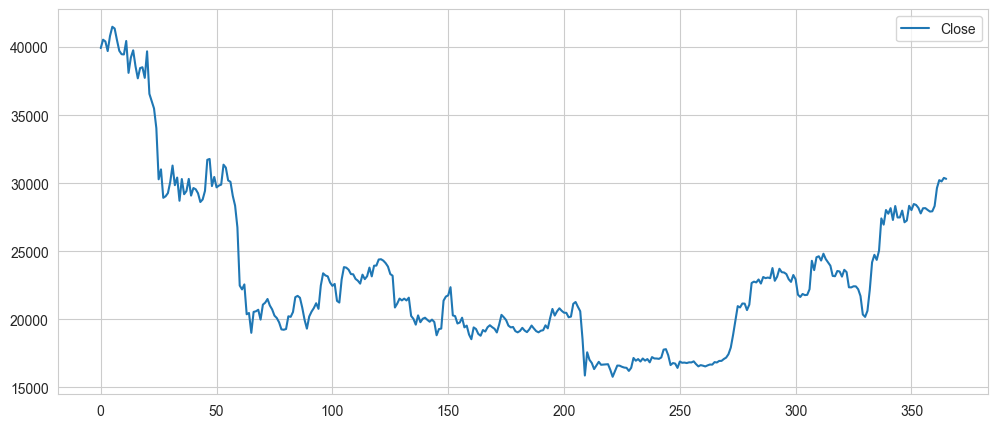

In [4]:
btc['Close'].plot(legend = True, figsize=(12,5))

<Axes: >

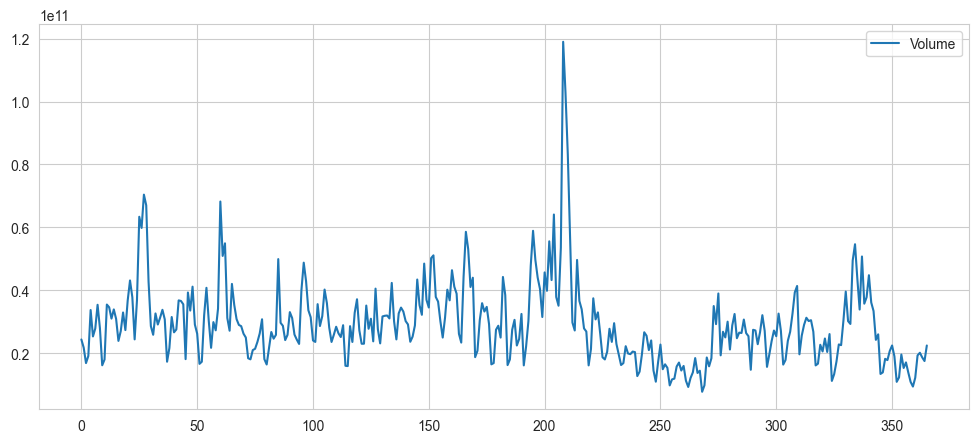

In [5]:
btc['Volume'].plot(legend=True,figsize=(12,5))

In [6]:
ma_days = [10,50,100,200]

for ma in ma_days:
    column_name = "MA %s days" %(str(ma))
    btc[column_name] = btc['Adj Close'].rolling(window=ma,center=False).mean()

<Axes: >

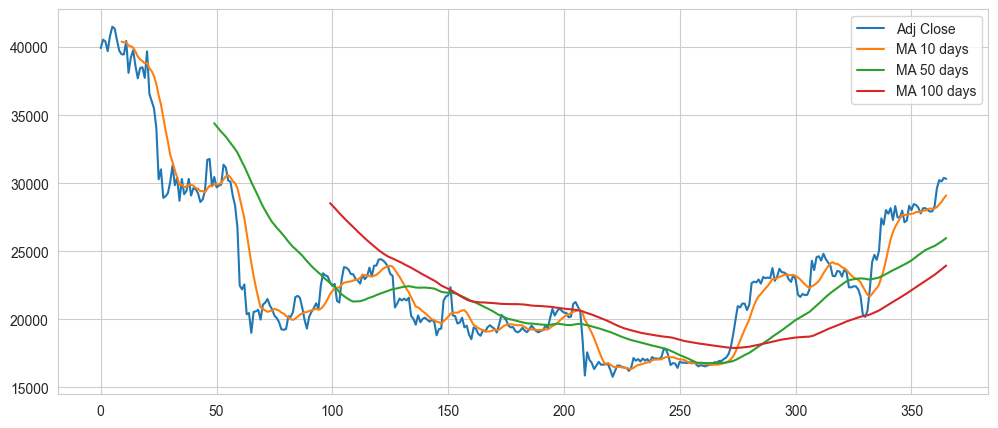

In [7]:
btc[['Adj Close','MA 10 days','MA 50 days','MA 100 days']].plot(legend=True,figsize=(12,5))

### Getting daily return rates

In [8]:
btc['Daily Return'] = btc['Close'].pct_change()
eth['Daily Return'] = eth['Close'].pct_change()


In [9]:
btc.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA 10 days,MA 50 days,MA 100 days,MA 200 days,Daily Return
361,2023-04-10,28336.027344,29771.464844,28189.271484,29652.980469,29652.980469,19282400094,28265.046484,25505.623398,23415.737324,20790.019287,0.046586
362,2023-04-11,29653.679688,30509.083984,29609.300781,30235.058594,30235.058594,20121259843,28447.448828,25613.741602,23551.837109,20844.706387,0.019630
363,2023-04-12,30231.582031,30462.480469,29725.574219,30139.052734,30139.052734,18651929926,28641.423242,25727.795586,23686.342930,20900.716592,-0.003175
364,2023-04-13,29892.740234,30539.845703,29878.623047,30399.066406,30399.066406,17487721001,28902.307812,25852.000039,23823.535020,20958.701436,0.008627
365,2023-04-14,30407.134766,31005.607422,30069.878906,30329.871094,30329.871094,22427895808,29118.485938,25979.647617,23958.201348,21014.237432,-0.002276


In [10]:
df=btc.merge(eth,on="Date",suffixes=('_btc', '_eth'))
df.set_index("Date",inplace=True)


<Axes: xlabel='Date'>

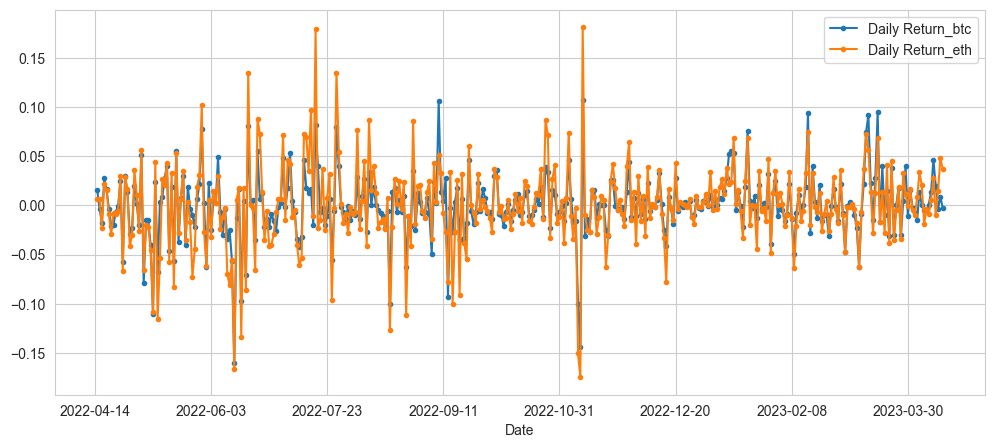

In [11]:
df[['Daily Return_btc','Daily Return_eth']].plot(marker='.',legend=True,figsize=(12,5))

<Axes: xlabel='Date'>

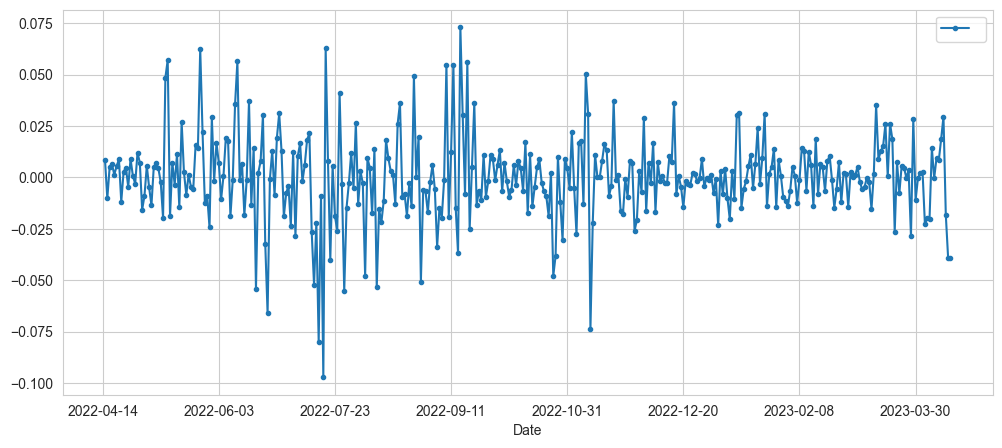

In [12]:
(df['Daily Return_btc']-df['Daily Return_eth']).plot(marker='.',legend=True,figsize=(12,5))


In [13]:
#sns.jointplot('Daily Return_btc','Daily Return_eth',df,kind='scatter')
df[['Daily Return_btc','Daily Return_eth']]

,Daily Return_btc,Daily Return_eth
Date,,
2022-04-14,NaN,NaN
2022-04-15,0.015474,0.006956
2022-04-16,-0.003181,0.007035
2022-04-17,-0.017503,-0.022502
2022-04-18,0.027929,0.021448
...,...,...
2023-04-10,0.046586,0.027869
2023-04-11,0.019630,-0.009951
2023-04-12,-0.003175,0.015058


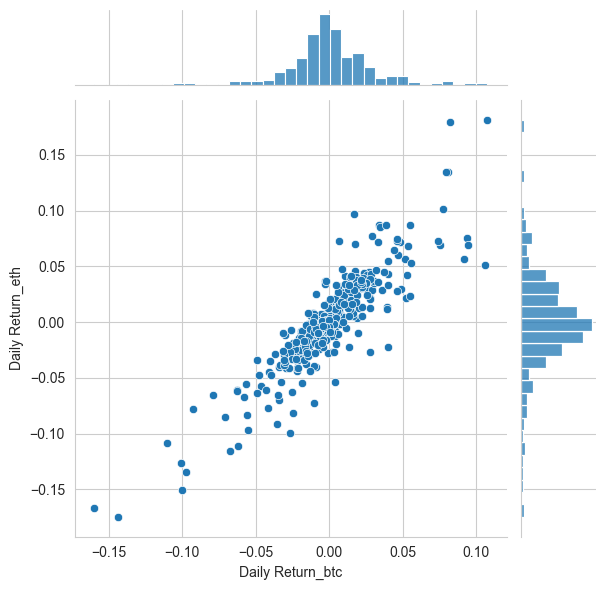

In [14]:
sns.jointplot(data=df,x="Daily Return_btc",y="Daily Return_eth",kind='scatter')

## Correlation between coins

<Axes: >

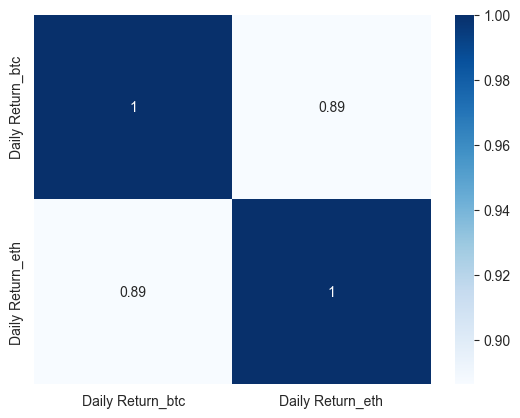

In [15]:
corr = df[['Daily Return_btc','Daily Return_eth']].dropna().corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap='Blues')


Correlation level of bitcoin and etherium is extremly high.

In [16]:
doge['Daily Return_doge'] = doge['Close'].pct_change()


In [17]:
doge

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return_doge
0,2022-04-14,0.140053,0.146633,0.138101,0.143920,0.143920,1759067761,NaN
1,2022-04-15,0.143917,0.149287,0.142767,0.146026,0.146026,1140382087,0.014633
2,2022-04-16,0.146017,0.147811,0.142093,0.143712,0.143712,584019179,-0.015846
3,2022-04-17,0.143693,0.144709,0.138995,0.139459,0.139459,636442285,-0.029594
4,2022-04-18,0.139471,0.140461,0.134384,0.140286,0.140286,909718484,0.005930
...,...,...,...,...,...,...,...,...
361,2023-04-10,0.083297,0.085272,0.082470,0.084852,0.084852,473882914,0.018754
362,2023-04-11,0.084851,0.085710,0.083899,0.084237,0.084237,472611203,-0.007248
363,2023-04-12,0.084237,0.084429,0.081319,0.083433,0.083433,540510658,-0.009544
364,2023-04-13,0.083428,0.088381,0.083020,0.087484,0.087484,810485328,0.048554


In [18]:
combined=df.merge(doge,on="Date")

<Axes: >

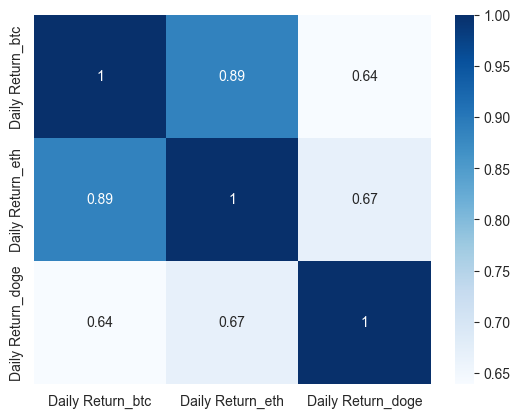

In [19]:
corr = combined[['Daily Return_btc','Daily Return_eth',"Daily Return_doge"]].dropna().corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap='Blues')

A smaller coin like doge coin can move unexpectedly and does not always follow the general trend of bitcoin as we can see here.

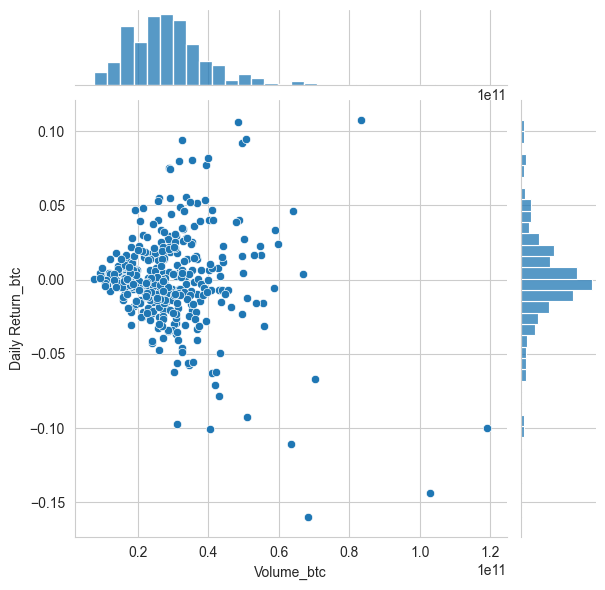

In [20]:
sns.jointplot(data=df,x="Volume_btc",y="Daily Return_btc",kind='scatter')

With the increased volume bitcoin becomes more volatile but there is not any positive or negative correlation.

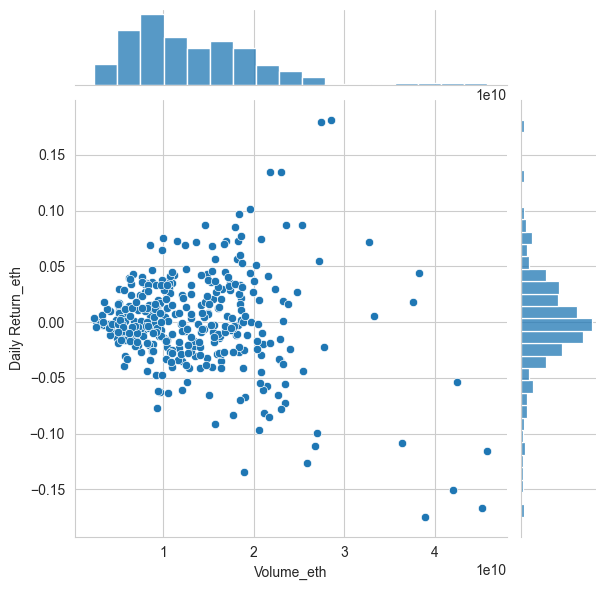

In [21]:
sns.jointplot(data=df,x="Volume_eth",y="Daily Return_eth",kind='scatter')

The data looks like there can be a tiny negative correlation between volume and daily return in etherium, lets just quickly check that.

In [22]:
corr = combined[['Daily Return_eth',"Volume_eth"]].dropna().corr()
corr

,Daily Return_eth,Volume_eth
Daily Return_eth,1.000000,-0.161285
Volume_eth,-0.161285,1.000000


and looks like it was correct

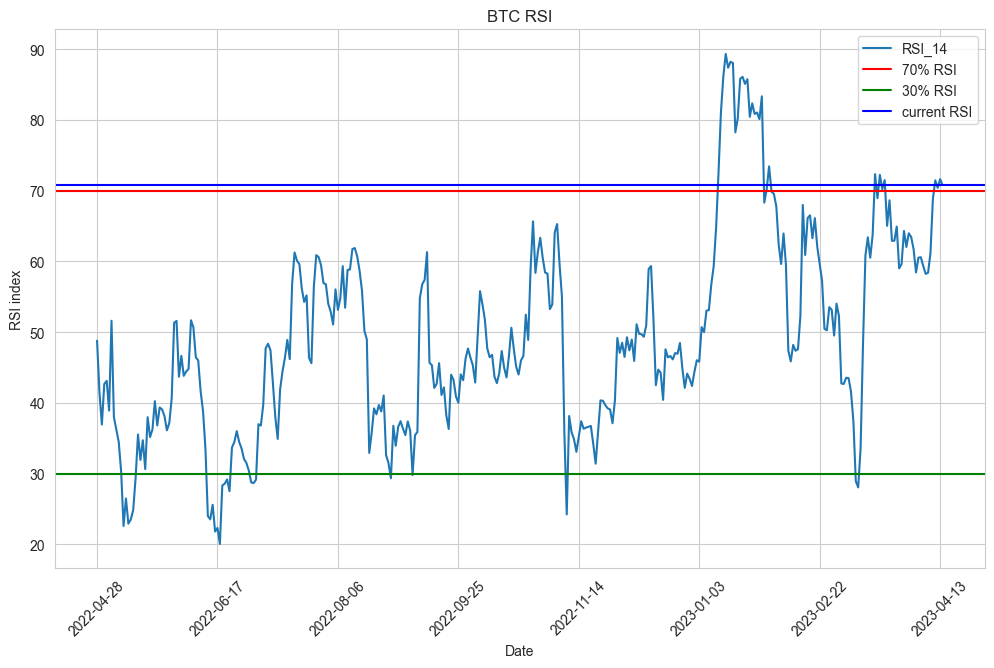

In [23]:
btc.set_index("Date", inplace=True)
rsi_btc = pta.rsi(btc["Close"],length=14).dropna()
rsi_btc
rsi_btc.plot(title = 'BTC RSI', rot=45,figsize=(12,7), ylabel='RSI index')
plt.axhline(70,color='r', label='70% RSI')
plt.axhline(30,color='g', label='30% RSI')
plt.axhline(rsi_btc.iloc[-1], color='b', label='current RSI')
plt.legend(loc='best')